In [1]:
%matplotlib inline
# tools
import sys
sys.path.append('/Users/mehdi/Dropbox/github/DESILSS')
import numpy as np
import matplotlib.pyplot as plt
import nn  # neural net pipeline 

/Users/mehdi/anaconda3/envs/py3p6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Reading input file, 4-fold prepared

In [13]:
dfile = np.load('./test/ngal-features-4fold.npz')
data4fold = dfile['arr_0'].item()

In [14]:
def fixlabel(array):
    dt = [('hpix','<i8'), ('features','<f8',(10,)), ('label','<f8')]
    a  = np.zeros(array.size, dtype=dt)
    for name in array.dtype.names:
        a[name] = array[name]
    return a

Running NN regression

In [15]:
address = "./outputs/new/" # path for outputs   * new fixes the scaling bug
config = {'nchain':10, 'nepoch':500, 'batchsize':2000, 'learning_rate':0.01}
for i in [0, 1, 2, 3]:
    fold_i = 'fold'+str(i)
    print(fold_i, ' is being processed')
    nn.run_nchainlearning(address+fold_i+'/',
                       fixlabel(data4fold['train'][fold_i]), 
                       fixlabel(data4fold['test'][fold_i]),
                      **config)

fold0  is being processed
(18935, 10) (18935, 1)
(6312, 10) (6312, 1)
(6312, 10) (6312, 1)
chain  0
baseline -1.7411768122138183e-16
chain  1
baseline -1.7411768122138183e-16
chain  2
baseline -1.7411768122138183e-16
chain  3
baseline -1.7411768122138183e-16
chain  4
baseline -1.7411768122138183e-16
chain  5
baseline -1.7411768122138183e-16
chain  6
baseline -1.7411768122138183e-16
chain  7
baseline -1.7411768122138183e-16
chain  8
baseline -1.7411768122138183e-16
chain  9
baseline -1.7411768122138183e-16
output is saved as reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01 under ./outputs/new/fold0/
fold1  is being processed
(18935, 10) (18935, 1)
(6312, 10) (6312, 1)
(6312, 10) (6312, 1)
chain  0
baseline -9.006086959726646e-17
chain  1
baseline -9.006086959726646e-17
chain  2
baseline -9.006086959726646e-17
chain  3
baseline -9.006086959726646e-17
chain  4
baseline -9.006086959726646e-17
chain  5
baseline -9.006086959726646e-17
chain  6
baseline -9.006086959726646e-17
chain  7


In [16]:
# reading outputs for plotting
from glob import glob

In [17]:
files = glob("./outputs/new/fold*/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz")
files

['./outputs/new/fold0/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 './outputs/new/fold1/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 './outputs/new/fold2/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 './outputs/new/fold3/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz']

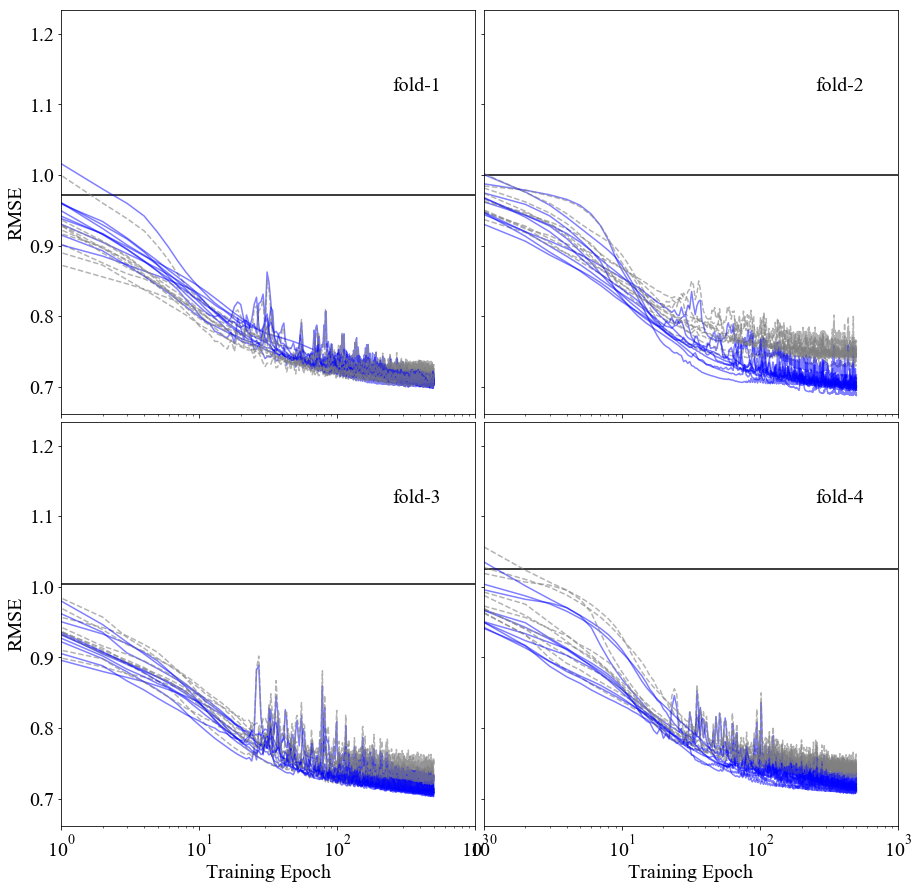

In [18]:
# RMSE 
"""
    Plotting the RMSE for 4 different folds

"""
plt.rc('font', size=20, family='Times New Roman')
f, ax = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
ax = ax.flatten()
for j,file_i in enumerate(files):
    d = np.load(file_i)
    out = d['arr_0'].item()
    for i,rmse in enumerate(out['epoch_RMSEs']):
        if i == 0:
            ax[j].hlines(xmin=1,xmax=3000,y=rmse[2],linestyles='-', label='Baseline', alpha=1., color='k')
        ax[j].plot(rmse[-1][:,0], rmse[-1][:,1],ls='-',c='blue', alpha=0.5)
        ax[j].plot(rmse[-1][:,0], rmse[-1][:,2],ls='--',c='grey', alpha=0.6)
    ax[j].set_xscale('log')
    ax[j].text(0.8, 0.8, "fold-"+str(j+1), transform=ax[j].transAxes)
    if j in [0, 2]:ax[j].set_ylabel('RMSE')
    if j in [2, 3]:ax[j].set_xlabel('Training Epoch')
    #ax[j].set_ylim(3.5, 4.5)
    ax[j].set_xlim(1, 1000)
    #ax[j].set_yscale('log')

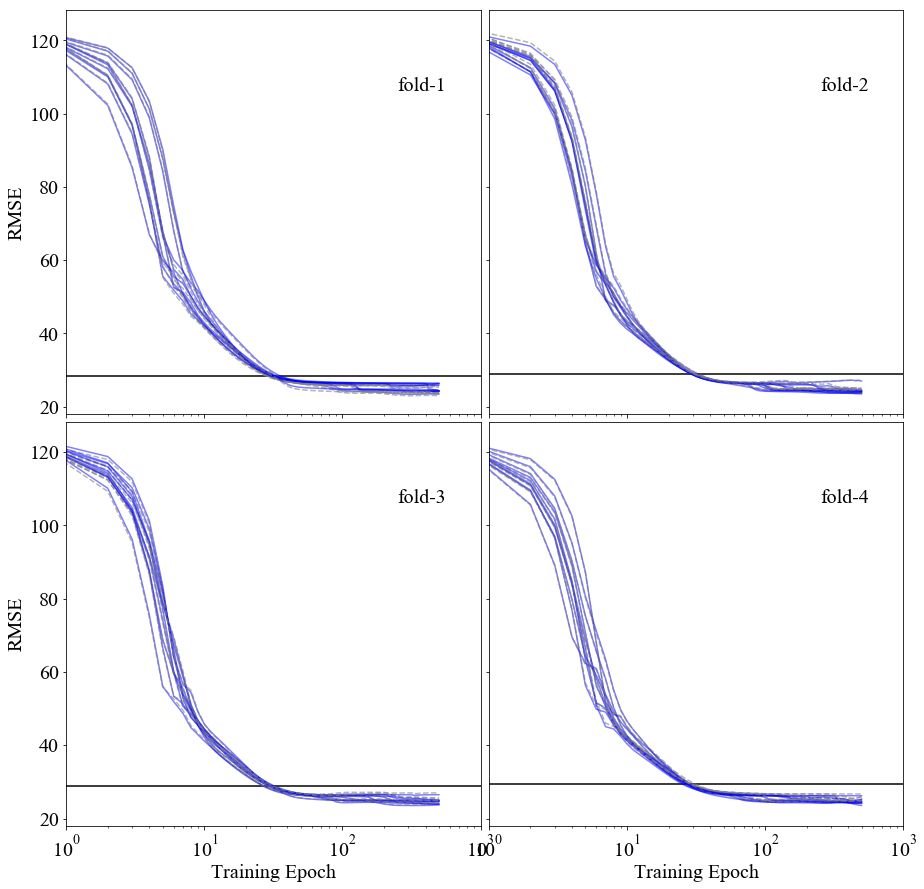

In [7]:
# RMSE 
"""
    Plotting the RMSE for 4 different folds

"""
plt.rc('font', size=20, family='Times New Roman')
f, ax = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
ax = ax.flatten()
for j,file_i in enumerate(files):
    d = np.load(file_i)
    out = d['arr_0'].item()
    for i,rmse in enumerate(out['epoch_RMSEs']):
        if i == 0:
            ax[j].hlines(xmin=1,xmax=3000,y=rmse[2],linestyles='-', label='Baseline', alpha=1., color='k')
        ax[j].plot(rmse[-1][:,0], rmse[-1][:,1],ls='-',c='blue', alpha=0.5)
        ax[j].plot(rmse[-1][:,0], rmse[-1][:,2],ls='--',c='grey', alpha=0.6)
    ax[j].set_xscale('log')
    ax[j].text(0.8, 0.8, "fold-"+str(j+1), transform=ax[j].transAxes)
    if j in [0, 2]:ax[j].set_ylabel('RMSE')
    if j in [2, 3]:ax[j].set_xlabel('Training Epoch')
    #ax[j].set_ylim(3.5, 4.5)
    ax[j].set_xlim(1, 1000)
    #ax[j].set_yscale('log')

In [8]:
# reading predictions
"""
    Reading the Ngal and systematic
"""
p_true = []
x_true = []
y_true = []
y_pred = []
y_base = []
for j,file_i in enumerate(files):
    d = np.load(file_i)
    out = d['arr_0'].item()
    p_true.append(out['test'][0])
    x_true.append(out['test'][1])
    y_true.append(out['test'][2].squeeze())
    ybasei = np.ones(out['test'][2].shape[0])*np.mean(out['train'][2])
    print(np.sqrt(np.mean((out['test'][2].squeeze() - ybasei)**2)), ybasei[0])
    y_base.append(ybasei)
    y_avg = []
    for i in range(len(out['chain_y'])):
        y_avg.append(out['chain_y'][i][1].squeeze().tolist())    
    y_pred.append(np.mean(np.array(y_avg), axis=0))

Ptrue = np.concatenate(p_true)
Xtrue = np.concatenate(x_true)
Ytrue = np.concatenate(y_true)
Ybase = np.concatenate(y_base)
Ypred = np.concatenate(y_pred)
print(Xtrue.shape, Ytrue.shape, Ypred.shape, Ybase.shape)

28.287531985176905 119.42635331396885
28.898423542248214 119.27082123052548
28.977372233728804 119.73218906786374
29.430246878687132 119.64453950147866
(25247, 10) (25247,) (25247,) (25247,)


In [9]:
#import healpy as hp

/Users/mehdi/anaconda3/envs/py3p6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(0.009, 0.3)

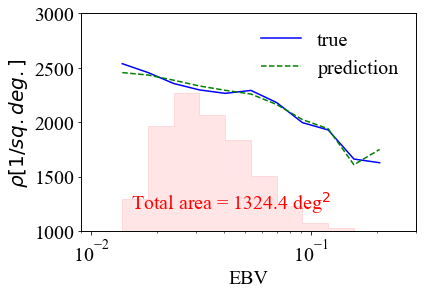

In [10]:
nside2pixarea =lambda nside: 4.*np.pi / (12*nside*nside) * 3282.80635
def get_nsys(sys, ngal):
    bins = np.logspace(np.log10(np.min(sys)), np.log10(2.0086), 20)
    npix,_ = np.histogram(sys, bins=bins)
    ngalp,_ = np.histogram(sys, bins=bins, weights=ngal)
    area = nside2pixarea(nside=256)
    avg  = np.sum(ngalp)/np.sum(npix)/area
    return 0.5*(bins[:-1]+bins[1:]), ngalp/npix/area, area*npix

xl=[]
y1l =[]
y2l = []
for x,y in [(Xtrue[:,0], Ytrue),(Xtrue[:,0], Ypred), (Xtrue[:,0], Ybase)]:
    x, y, a = get_nsys(x, y)
    xl.append(x)
    y1l.append(y)
    y2l.append(a)

    
f, ax1 = plt.subplots()
ax2 = ax1.twinx()
lt = ['-','--']
c  = ['blue', 'green']
for i, label_i in enumerate(['true', 'prediction']):
    ax1.plot(xl[i], y1l[i], ls=lt[i], color=c[i], label=label_i)
ax2.fill_between(xl[0], y2l[0], color='red', alpha=0.1, step='pre')
ax1.legend(frameon=False)
ax1.set_ylabel(r'$\rho [1/sq. deg.]$')
ax2.text(0.15, 0.1, r'Total area = {:.1f} deg$^{}$'.format(np.sum(y2l[0]),2),
         transform=ax2.transAxes, fontsize=20, color='r')
ax2.set_yticks([])
ax1.set_xlabel(r'EBV')
ax1.set_ylim(1000, 3000)
ax2.set_ylim(0, 500)
ax1.set_xscale('log')
ax1.set_xlim(xmin=0.009, xmax=0.3)
#plt.savefig('./figures_pdf/density_ebv.pdf', bbox_inches='tight')

# plt.rc('axes.spines', right=False, top=False)
# f, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# lt = ['-','--',':']
# c  = ['blue', 'green','violet']
# for i, label_i in enumerate(['true', 'prediction','baseline']):
#     ax1.plot(xl[i], y1l[i], ls=lt[i], color=c[i] )
#     ax1.text(0.1, 0.9-i*0.06, label_i, color=c[i], transform=ax1.transAxes)
    
    
# ax1.set_title('eboss21+22')
# ax2.fill_between(xl[0], y2l[0], color='red', alpha=0.1, step='pre')
# ax1.set_ylabel(r'$\rho [1/sq. deg.]$')
# ax2.text(0.15, 0.1, r'Total area ~ {:.1f} deg$^{}$'.format(np.sum(y2l[0]),2),
#          transform=ax2.transAxes, fontsize=20, color='r')
# ax2.text(0.4, 0.9, "Ngal normed by fracgood", color='k', transform=ax2.transAxes, fontsize=15)
# ax2.set_yticks([])
# ax1.set_xlabel(r'RBS')
# ax1.set_ylim(130, 220)
# # ax2.set_ylim(0, 500)
# ax1.set_xscale('log')
# # ax1.set_xlim(xmin=0.009, xmax=0.3)
# # plt.savefig('./density_ebv.pdf', bbox_inches='tight')